# Pydantic with Gemini

In [1]:
from google import genai

client = genai.Client()

response = client.models.generate_content(model="gemini-2.5-flash", contents="tell me a programming joke")

print(response.text)

Why do programmers prefer dark mode?

Because light attracts bugs!


In [5]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents="""
    You are a helpful assistant. I need you to create a JSON object representing a library.
    The library's name should be "Coolu Libraru" and have fields name and books that contains a list of books.
    Each book should have a 'title', 'author' and 'year' field. Make sure the output is a single, valid JSON object.
    Give me 10 books. Remove the ```json and ``` from the output
""")

response.text

'{\n  "name": "Coolu Libraru",\n  "books": [\n    {\n      "title": "The Great Gatsby",\n      "author": "F. Scott Fitzgerald",\n      "year": 1925\n    },\n    {\n      "title": "1984",\n      "author": "George Orwell",\n      "year": 1949\n    },\n    {\n      "title": "To Kill a Mockingbird",\n      "author": "Harper Lee",\n      "year": 1960\n    },\n    {\n      "title": "Pride and Prejudice",\n      "author": "Jane Austen",\n      "year": 1813\n    },\n    {\n      "title": "The Catcher in the Rye",\n      "author": "J.D. Salinger",\n      "year": 1951\n    },\n    {\n      "title": "Lord of the Rings",\n      "author": "J.R.R. Tolkien",\n      "year": 1954\n    },\n    {\n      "title": "Moby Dick",\n      "author": "Herman Melville",\n      "year": 1851\n    },\n    {\n      "title": "War and Peace",\n      "author": "Leo Tolstoy",\n      "year": 1869\n    },\n    {\n      "title": "The Hobbit",\n      "author": "J.R.R. Tolkien",\n      "year": 1937\n    },\n    {\n      "title

In [6]:
print(response.text)

{
  "name": "Coolu Libraru",
  "books": [
    {
      "title": "The Great Gatsby",
      "author": "F. Scott Fitzgerald",
      "year": 1925
    },
    {
      "title": "1984",
      "author": "George Orwell",
      "year": 1949
    },
    {
      "title": "To Kill a Mockingbird",
      "author": "Harper Lee",
      "year": 1960
    },
    {
      "title": "Pride and Prejudice",
      "author": "Jane Austen",
      "year": 1813
    },
    {
      "title": "The Catcher in the Rye",
      "author": "J.D. Salinger",
      "year": 1951
    },
    {
      "title": "Lord of the Rings",
      "author": "J.R.R. Tolkien",
      "year": 1954
    },
    {
      "title": "Moby Dick",
      "author": "Herman Melville",
      "year": 1851
    },
    {
      "title": "War and Peace",
      "author": "Leo Tolstoy",
      "year": 1869
    },
    {
      "title": "The Hobbit",
      "author": "J.R.R. Tolkien",
      "year": 1937
    },
    {
      "title": "Frankenstein",
      "author": "Mary Shelley",

## Pydantic to validate the simulated data

In [8]:
from pydantic import BaseModel, Field
from datetime import datetime

class Book(BaseModel):
    title: str
    author: str
    year: int = Field(gt=1000, lt=datetime.now().year)

class Library(BaseModel):
    name: str
    books: list[Book]

library = Library.model_validate_json(response.text)
library

Library(name='Coolu Libraru', books=[Book(title='The Great Gatsby', author='F. Scott Fitzgerald', year=1925), Book(title='1984', author='George Orwell', year=1949), Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960), Book(title='Pride and Prejudice', author='Jane Austen', year=1813), Book(title='The Catcher in the Rye', author='J.D. Salinger', year=1951), Book(title='Lord of the Rings', author='J.R.R. Tolkien', year=1954), Book(title='Moby Dick', author='Herman Melville', year=1851), Book(title='War and Peace', author='Leo Tolstoy', year=1869), Book(title='The Hobbit', author='J.R.R. Tolkien', year=1937), Book(title='Frankenstein', author='Mary Shelley', year=1818)])

In [9]:
library.name

'Coolu Libraru'

In [10]:
library.books

[Book(title='The Great Gatsby', author='F. Scott Fitzgerald', year=1925),
 Book(title='1984', author='George Orwell', year=1949),
 Book(title='To Kill a Mockingbird', author='Harper Lee', year=1960),
 Book(title='Pride and Prejudice', author='Jane Austen', year=1813),
 Book(title='The Catcher in the Rye', author='J.D. Salinger', year=1951),
 Book(title='Lord of the Rings', author='J.R.R. Tolkien', year=1954),
 Book(title='Moby Dick', author='Herman Melville', year=1851),
 Book(title='War and Peace', author='Leo Tolstoy', year=1869),
 Book(title='The Hobbit', author='J.R.R. Tolkien', year=1937),
 Book(title='Frankenstein', author='Mary Shelley', year=1818)]

In [11]:
library.books[1]

Book(title='1984', author='George Orwell', year=1949)

In [13]:
library.books[1].title, library.books[1].year

('1984', 1949)

In [14]:
titles = [book.title for book in library.books]
titles

['The Great Gatsby',
 '1984',
 'To Kill a Mockingbird',
 'Pride and Prejudice',
 'The Catcher in the Rye',
 'Lord of the Rings',
 'Moby Dick',
 'War and Peace',
 'The Hobbit',
 'Frankenstein']

In [18]:
newer_books = [(book.title, book.year) for book in library.books if book.year > 1950]
newer_books

[('To Kill a Mockingbird', 1960),
 ('The Catcher in the Rye', 1951),
 ('Lord of the Rings', 1954)]

In [19]:
library.model_dump()

{'name': 'Coolu Libraru',
 'books': [{'title': 'The Great Gatsby',
   'author': 'F. Scott Fitzgerald',
   'year': 1925},
  {'title': '1984', 'author': 'George Orwell', 'year': 1949},
  {'title': 'To Kill a Mockingbird', 'author': 'Harper Lee', 'year': 1960},
  {'title': 'Pride and Prejudice', 'author': 'Jane Austen', 'year': 1813},
  {'title': 'The Catcher in the Rye', 'author': 'J.D. Salinger', 'year': 1951},
  {'title': 'Lord of the Rings', 'author': 'J.R.R. Tolkien', 'year': 1954},
  {'title': 'Moby Dick', 'author': 'Herman Melville', 'year': 1851},
  {'title': 'War and Peace', 'author': 'Leo Tolstoy', 'year': 1869},
  {'title': 'The Hobbit', 'author': 'J.R.R. Tolkien', 'year': 1937},
  {'title': 'Frankenstein', 'author': 'Mary Shelley', 'year': 1818}]}

In [22]:
library.model_dump_json(indent=4)

'{\n    "name": "Coolu Libraru",\n    "books": [\n        {\n            "title": "The Great Gatsby",\n            "author": "F. Scott Fitzgerald",\n            "year": 1925\n        },\n        {\n            "title": "1984",\n            "author": "George Orwell",\n            "year": 1949\n        },\n        {\n            "title": "To Kill a Mockingbird",\n            "author": "Harper Lee",\n            "year": 1960\n        },\n        {\n            "title": "Pride and Prejudice",\n            "author": "Jane Austen",\n            "year": 1813\n        },\n        {\n            "title": "The Catcher in the Rye",\n            "author": "J.D. Salinger",\n            "year": 1951\n        },\n        {\n            "title": "Lord of the Rings",\n            "author": "J.R.R. Tolkien",\n            "year": 1954\n        },\n        {\n            "title": "Moby Dick",\n            "author": "Herman Melville",\n            "year": 1851\n        },\n        {\n            "title": "

In [24]:
with open("library.json", "w") as json_file:
    json_file.write(library.model_dump_json(indent=4))

## Create pandas dataframe

In [27]:
import pandas as pd

titles = [book.title for book in library.books]
years = [book.year for book in library.books]
authors = [book.author for book in library.books]

df = pd.DataFrame({"title": titles, "year": years, "author": authors})
df

,title,year,author
0,The Great Gatsby,1925,F. Scott Fitzgerald
1,1984,1949,George Orwell
2,To Kill a Mockingbird,1960,Harper Lee
3,Pride and Prejudice,1813,Jane Austen
4,The Catcher in the Rye,1951,J.D. Salinger
5,Lord of the Rings,1954,J.R.R. Tolkien
6,Moby Dick,1851,Herman Melville
7,War and Peace,1869,Leo Tolstoy
8,The Hobbit,1937,J.R.R. Tolkien
9,Frankenstein,1818,Mary Shelley


<Axes: ylabel='Frequency'>

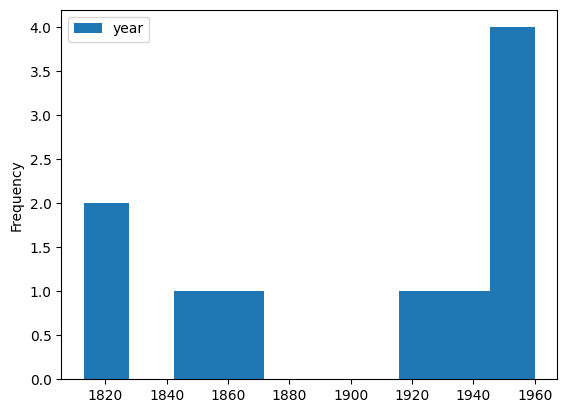

In [40]:
df.plot(kind="hist")